# Greenest City Projects - A Statistical Inference

By: Ankur Bhardwaj, Uliana Ryazanova, and Ayush Vora - Group 43

## Introduction

In 2011, the Vancouver city council approved the Greenest City Action Plan (GCAP). The plan set the goal to make Vancouver the greenest city in the world by 2020, focusing on increasing the city’s sustainability. It outlined 10 different areas of focus; the economy, climate leadership, buildings, transportation, zero waste, access to nature, ecological footprint, water, air, and local food. As this action plan has been wrapped up in 2020 with 8 out of 18 of its goals achieved, there remains many opportunities for new city-wide sustainability projects. In this project, we are interested in predicting which of the 10 categories above will be more targeted by future large scale Vancouver City action plans for sustainability. While we do not have the means to predict future circumstances that may affect the city’s decisions, we are interested in recognizing a pattern in the types of projects the GCAP is more likely to fund to observe where the city tends to place more focus in comparison to other, smaller city-funded projects or private projects. Therefore, we will be treating our dataset as one large sample for a population that does not yet exist, keeping in mind that our conclusions may or may not be accurate but may provide insight on what we can expect in the future.  We will be implementing the proportion of Greenest City-funded projects to all projects in each of the 10 categories as our location parameter which will allow us to make comparisons, and the overall proportion of GCAP-funded projects to all sustainability projects, in order to observe the overall involevement of the GCAP in sustainability projects.

## Preliminary Results

In [38]:
## Import Required Libraries and Data
library(tidyverse)
library(broom)
library(repr)
library(digest)
library(infer)
library(gridExtra)
data <- read.csv("https://raw.githubusercontent.com/ayushtvora/stat-201-project/main/data/greenest-city-projects.csv", sep = ";")
head(data)
## Source for Data: https://opendata.vancouver.ca/explore/dataset/greenest-city-projects/information/

,MAPID,NAME,CATEGORY1,CATEGORY2,ADDRESS,SHORT_DESCRIPTION,URL,URL2,URL3,Geom,Geo.Local.Area
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,GCP002,Southeast False Creek Neighbourhood Ener,City projects,Climate-Leadership,,City's first neighbourhood energy system serving the Olympic Village and soon to be Great Northern Way areas.,http://vancouver.ca/home-property-development/neighbourhood-energy-utility.aspx,,http://www.greenbuildingaudiotours.com/buildings/sefc_neighbourhood_energy_utility,"{""coordinates"": [-123.114480365604, 49.2671751297035], ""type"": ""Point""}",Mount Pleasant
2,GCP008,LEED Platinum Building Certified in 2010,City projects,Green-Buildings,51 W 1st AV,City of Vancouver Housing - Net Zero Building (SEFC Parcel 9),http://www.thechallengeseries.ca/chapter-07/net-zero/,,,"{""coordinates"": [-123.1046728, 49.27020319], ""type"": ""Point""}",Mount Pleasant
3,GCP011,LEED Platinum Neighbourhood Certified in,Private projects,Green-Buildings,12 Athletes Way,Southeast False Creek Neighbourhood,http://greenbuildingbrain.org/items/southeast_false_creek_olympic_village,,http://recollective.ca/projects/vancouver-olympic-village/,"{""coordinates"": [-123.1053979, 49.27154122], ""type"": ""Point""}",Mount Pleasant
4,GCP012,LEED Gold Building Certified 2012,Private projects,Green-Buildings,1866 Main Mall,UBC Renew - Buchanan Complex,http://www.projectservices.lbs.ubc.ca/portfolio/renewal/buchanan-block-a.htm,,,"{""coordinates"": [-123.2548825, 49.26730312], ""type"": ""Point""}",
5,GCP018,LEED Gold Building Certified 2011,Private projects,Green-Buildings,2177 Wbrook Mall,UBC Renew Friedman Building,http://recollective.ca/projects/ubc-friedman-building/,,,"{""coordinates"": [-123.2460724, 49.26536007], ""type"": ""Point""}",
6,GCP019,LEED Gold for Commercial Interiors 2011,Private projects,Green-Buildings,507 W Broadway,City of Vancouver Engineering Services,http://edgesustainability.com/?portfolio=city-of-vancouver-engineering,,,"{""coordinates"": [-123.1154173, 49.26336597], ""type"": ""Point""}",Fairview


From the dataset, the only columns that we need to worry about is `CATEGORY1`, which represents the project funder. So, when cleaning our data, we selected only this column, and changed the ambiguous column name `CATEGORY1` to something more understandable, which is `project_funder`.

In [39]:
## Tidy and Wrangle Data
tidy_data <- data |> 
    select(project_funder = CATEGORY1, project_category = CATEGORY2) # Selecting only Relavent Data
head(tidy_data)

,project_funder,project_category
,<chr>,<chr>
1,City projects,Climate-Leadership
2,City projects,Green-Buildings
3,Private projects,Green-Buildings
4,Private projects,Green-Buildings
5,Private projects,Green-Buildings
6,Private projects,Green-Buildings


Next, we plotted this data to show the difference between the different funders. From this, we can see that the Greenest City Fund is the largest funder of projects, followed closely by private projects. However, because this is a sample, nothing can be confirmed about this data yet.

Next is a pie graph to visualize the proportions between Greenest City Fund Projects and the total of all the other projects. With this graph, we can see that around 40% of the projects are Greenest City Fund Projects. 

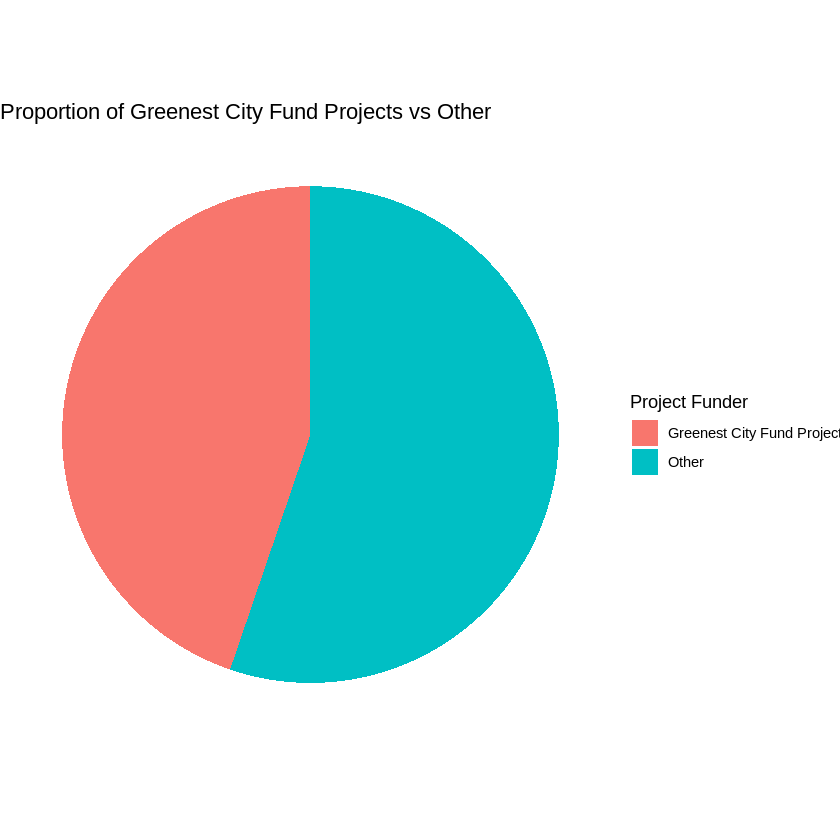

In [40]:
## Graphing the Proportion Differences
raw_proportion_graph <- tidy_data |> 
    mutate(project_funder = (project_funder == "Greenest City Fund Project")) |> 
    mutate(project_funder = str_replace(project_funder, "FALSE", "Other")) |> 
    mutate(project_funder = str_replace(project_funder, "TRUE", "Greenest City Fund Project")) |> 
    group_by(project_funder) |>
    summarize(n = n()) |>
    ggplot() +
    geom_bar(stat = "identity", aes(x = "", y = n, fill = project_funder)) +
    coord_polar("y", start=0) +
    ggtitle("Proportion of Greenest City Fund Projects vs Other") +
    labs(fill = "Project Funder") +
    theme_void()

raw_proportion_graph

Next, we calculate the numerical point estimate, which in this case, is the proportion of Greenest City Fund Projects compared to all projects. We find this using the infer package.

In [41]:
## Calculating the Proportion
p_hat <- tidy_data |> 
    mutate(project_funder = (project_funder == "Greenest City Fund Project")) |> # Sets values that are success to true, false otherwise.
    specify(response = project_funder, success = "TRUE") |> # Using infer package to find the proportion
    calculate(stat = "prop") |>
    pull()

p_hat

[1] 0.4475309

Next, we calculated the proportions of Greenest City Funded projects by project category in a dataframe. 

In [42]:
sust_proj_props <- tidy_data |> 
    group_by(project_category) |> 
    summarize(prop = mean(project_funder == "Greenest City Fund Project"))
sust_proj_props

project_category,prop
<chr>,<dbl>
Access-to-Nature,0.4583333
Clean-Air,0.0000000
Climate-Leadership,0.3333333
Green-Buildings,0.0000000
Green-BuildingsLocal-Food,0.0000000
Green-Economy,0.6000000
Green-Transportation,0.3846154
Lighter-Footprint,0.9000000
Local-Food,0.4797688


Finally, we graphed the proportions of Greenest City Funded projects separated by project categories.

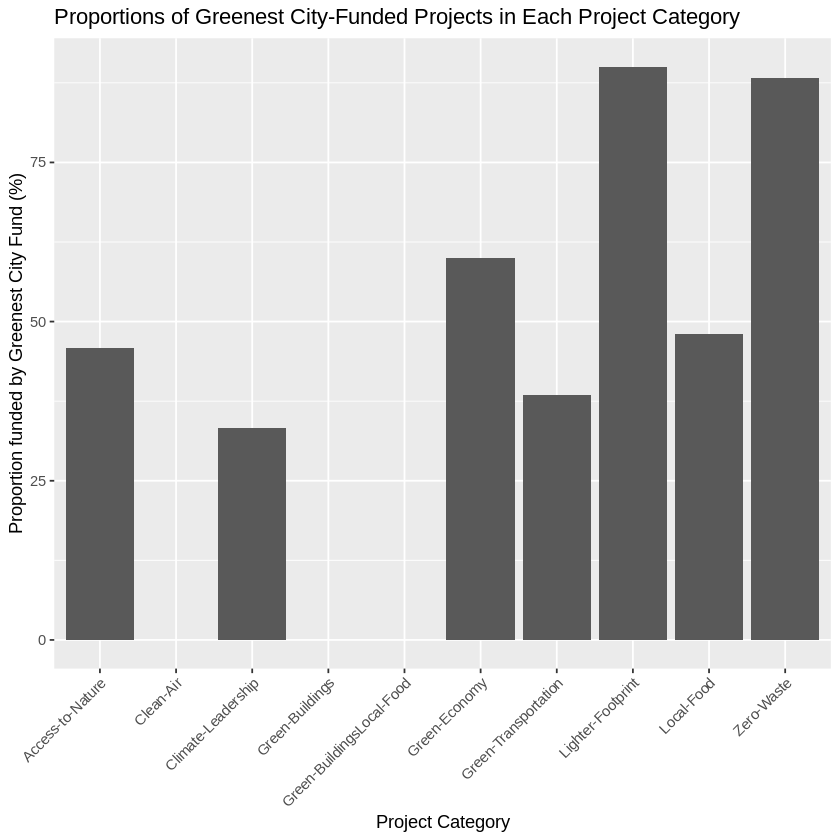

In [43]:
## Graphing the proportions of Greenest City Funded per project category
prop_graph <- sust_proj_props |>
    ggplot() +
    geom_bar(stat = "identity", aes(x = project_category, y = prop*100)) +
    ggtitle("Proportions of Greenest City-Funded Projects in Each Project Category") +
    labs(x = "Project Category", y = "Proportion funded by Greenest City Fund (%)") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

prop_graph

Here, we determined the 3 categories that have the highest proportion of GCAP-funded projects to all projects. Since we are looking for the project categories where the GCAP has focused the most, and for the sake of the length of this project, we decided to omit all other project type categories. 

In [44]:
## Step 1: Determine the top 3 popular categories
## Note: this could probably go under preliminary results and if we are only choosing top 3, we can just say these are the 3 we are focusing on
participating_categories <- tidy_data |>
    group_by(project_funder, project_category) |>
    summarize(n = n()) |>
    filter(project_funder == "Greenest City Fund Project") |>
    pull(project_category)
    
top_3_categories <- tidy_data |>
    group_by(project_category) |>
    summarize(count = n()) |>
    filter(project_category %in% participating_categories) |>
    top_n(3, count)


top_3_categories

`summarise()` has grouped output by 'project_funder'. You can override using
the `.groups` argument.


project_category,count
<chr>,<int>
Access-to-Nature,24
Lighter-Footprint,30
Local-Food,173


Next, we created a dataset that contains only the three categories we selected above.

In [45]:
## Step 2: Make datasets which only includes data for these three categories
get_specified_data <- function(category) {
    tidy_data |> 
    filter(project_category == category) |>
    mutate(project_funder = (project_funder == "Greenest City Fund Project")) |> 
    mutate(project_funder = str_replace(project_funder, "FALSE", "Other")) |> 
    mutate(project_funder = str_replace(project_funder, "TRUE", "Greenest City Fund Project"))
}

access_to_nature_data <- get_specified_data("Access-to-Nature")
lighter_footprint_data <- get_specified_data("Lighter-Footprint")
local_food_data <- get_specified_data("Local-Food")

head(access_to_nature_data)

,project_funder,project_category
,<chr>,<chr>
1,Other,Access-to-Nature
2,Other,Access-to-Nature
3,Other,Access-to-Nature
4,Other,Access-to-Nature
5,Other,Access-to-Nature
6,Other,Access-to-Nature


We pulled out the proportions of our data in the new dataset. 

In [46]:
## Step 3: Find the proportion of Greenest City Projects (p-hat) for each category
get_phat <- function(dataset) {
    dataset |>
    summarize(prop = mean(project_funder == "Greenest City Fund Project")) |>
    pull()
}

access_to_nature_phat <- get_phat(access_to_nature_data)
lighter_footprint_phat <- get_phat(lighter_footprint_data)
local_food_phat <- get_phat(local_food_data)

access_to_nature_phat
lighter_footprint_phat
local_food_phat

[1] 0.4583333

[1] 0.9

[1] 0.4797688

## Methods

### Plan

Our report is trustworthy, because the dataset is owned by the city of Vancouver, a reliable source, and, since our dataset is sufficiently large in size, our sampling distribution of proportion would follow the normal distribution according to the Central Limit Theorem. The larger the sample size, the better the normal approximation.

The plots and estimates we currently have don’t provide us with much information as they are from point estimates of the dataset we are treating as a sample, and not much data can be inferred from it. We would want to give the stakeholder accurate and informative data which we can obtain by doing hypothesis testing and using confidence intervals.

In this project, we are aiming to observe which types of projects the GCAP was predominantly active in. Therefore, we will perform hypothesis testing using the null hypothesis $p = 0.5$, where p is the proportion of greenest city projects in a specific project type, out of the 10 project types. Our alternative hypothesis will be $p > 0.5$, which will allow us to determine if the proportion is large enough for this project category to be considered a major focus of the GCAP. We will test this hypothesis on each of the 10 project categories. 

$H0: p = 0.5$ <br/>
$H1: p > 0.5$

We will calculate the standard deviation (s) for each category to observe how trustworthy our results are. 

$H0: s = 2 SD$ <br/> 
$H1: s $
Basically, we want to assume that our standard deviation always falls within +-2SD as our null hypothesis. If it goes beyond that, we reject the null hypothesis and say that our data is not very representative of future potential statistics.

#### Expectations

We expect to find that Vancouver city’s future projects would focus on the same categories as the projects that the GCAP has focused on the most out of all the projects present in the dataset.

#### Impacts

These findings could allow the city of Vancouver to focus an appropriate amount of resources on all the projects instead of just focusing on one or two major projects. It would also allow the city of Vancouver to improve their plan to make Vancouver the greenest city with the future predictions.

#### Bootstrapping Approach

First, using the infer package, we use bootstrapping to generate the p-values for each of the 3 project type categories.

In [55]:
set.seed(12345)
## Step 4a: Use Bootstrapping Infer Package

## Doing it using means intead of props beacuse piazza isnt replying and idk what im doing
#get_bs <- function(dataset, h0) {
#    dataset |>
#    mutate(is_green_city = as.integer(project_funder == "Greenest City Fund Project")) |>
#    specify(response = is_green_city) |>
#    hypothesize(null = "point", mu = h0) |>
#    generate(reps = 10000, type = "bootstrap") |>
#    calculate(stat = "mean")
#}

get_bs <- function(curr_dataset, h0) {
    curr_dataset %>%
    specify(response = project_funder, success = "Greenest City Fund Project") %>%
    hypothesize(null = "point", p = h0) %>%
    generate(reps = 10000, type = "draw") %>%
    calculate(stat = "prop")
    }

head(get_bs)

get_pval_bs <- function(bs, phat) {
    get_p_value(bs, obs_stat = phat, direction = "two-sided")
}


access_to_nature_bs <- get_bs(access_to_nature_data, access_to_nature_phat)
lighter_footprint_bs <- get_bs(lighter_footprint_data, lighter_footprint_phat)
local_food_bs <- get_bs(local_food_data, local_food_phat)


#!!! WORKING ON THIS
#access_to_nature_pval_bs <- get_pval_bs(access_to_nature_bs, access_to_nature_phat)
#lighter_footprint_pval_bs <- get_pval_bs(lighter_footprint_bs, lighter_footprint_phat)
#local_food_pval_bs <- get_pval_bs(local_food_bs, local_food_phat)

access_to_nature_pval_bs
lighter_footprint_pval_bs
local_food_pval_bs

                                                                                                      
1 function (curr_dataset, h0)                                                                         
2 {                                                                                                   
3     curr_dataset %>% specify(response = project_funder, success = "Greenest City Fund Project") %>% 
4         hypothesize(null = "point", p = h0) %>% generate(reps = 10000,                              
5         type = "draw") %>% calculate(stat = "prop")                                                 
6 }                                                                                                   

p_value
<dbl>
0.8648


p_value
<dbl>
0


p_value
<dbl>
0.6426


In [11]:
## Visualizing the p value with the Bootstrap Sampling Distribution
get_viz_bs <- function(bs_data, phat) {
    bs_data |>
    visualize(bins = 15) +
    shade_p_value(obs_stat = phat, direction = "two-sided")
}

access_to_nature_viz_bs <- get_viz_bs(access_to_nature_bs, access_to_nature_phat)
lighter_footprint_viz_bs <- get_viz_bs(lighter_footprint_bs, lighter_footprint_phat)
local_food_viz_bs <- get_viz_bs(local_food_bs, local_food_phat)

## uncomment these to see them, removed right now to reduce space taken
## maybe find a way to combine them to see all three vertically
## also btw the p value for lighter footprint looks wrong but i cant figure out why it looks off
# access_to_nature_viz_bs
# lighter_footprint_viz_bs
# local_food_viz_bs

In [12]:
## Step 4: Repeating Process using T-Test
## The reason for using T-Test is because the sample size is somewhat small, so a T-distribution would be more accurate.
get_as <- function(dataset, h0) {
    tidy(t.test(
        x = dataset$project_funder == "Greenest City Fund Project",
        mu = h0, 
        alternative = "two.sided"))
}

get_pval_as <- function(data_as) {
    access_to_nature_as |>
    select(p.value)
}

access_to_nature_as <- get_as(access_to_nature_data, 0.5)
lighter_footprint_as <- get_as(lighter_footprint_data, 0.5)
local_food_as <- get_as(local_food_data, 0.5)

access_to_nature_pval_as <- get_pval_as(access_to_nature_as)
lighter_footprint_pval_as <- get_pval_as(lighter_footprint_as)
local_food_pval_as <- get_pval_as(local_food_as)

## here all the p values are the exact same which i dont THINK should be the case but im honestly not 100% sure id have to figure out why this is happening
access_to_nature_pval_as
lighter_footprint_pval_as
local_food_pval_as

p.value
<dbl>
0.6920866


p.value
<dbl>
0.6920866


p.value
<dbl>
0.6920866


#### Future Questions

Question 1: Does the Greenest City Project have a direct impact on carbon emissions?

Question 2: Do the private projects outlined in the dataset have a bigger impact on the environment than Greenest City Fund Projects?

## Works Cited

Greenest City Action Plan - Vancouver. (n.d.). Retrieved November 7, 2022, from https://vancouver.ca/files/cov/Greenest-city-action-plan.pdf 

Vancouver, C. of. (n.d.). Greenest City Action Plan. City of Vancouver. Retrieved November 6, 2022, from https://vancouver.ca/green-vancouver/greenest-city-action-plan.aspx#redirect 